In [ ]:
import pandas as pd

In [ ]:
data = "/content/drive/MyDrive/WORK/current work/donnee_de_consommation (5).csv"

home_current_df = pd.read_csv(data)
home_current_df.head()

,date,consumption(kWh),index type
0,2024-03-01,9.379,REEL
1,2024-03-02,60.438,REEL
2,2024-03-03,54.306,REEL
3,2024-03-04,57.302,REEL
4,2024-03-05,27.391,REEL


## Data descriptive analysis

In [ ]:
home_current_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              16 non-null     object 
 1   consumption(kWh)  16 non-null     float64
 2   index type        16 non-null     object 
dtypes: float64(1), object(2)
memory usage: 512.0+ bytes


In [ ]:
home_current_df.isnull().sum()

date                0
consumption(kWh)    0
index type          0
dtype: int64

In [ ]:
home_current_df.shape[1]

3

In [ ]:
pd.unique(home_current_df["consumption(kWh)"])

array([ 9.379, 60.438, 54.306, 57.302, 27.391, 21.174, 21.317, 24.402,
       22.103, 22.609, 19.367, 28.797, 15.618, 22.143, 12.357, 16.983])

In [ ]:
pd.unique(home_current_df["date"])

array(['2024-03-01', '2024-03-02', '2024-03-03', '2024-03-04',
       '2024-03-05', '2024-03-06', '2024-03-07', '2024-03-08',
       '2024-03-09', '2024-03-10', '2024-03-11', '2024-03-12',
       '2024-03-13', '2024-03-14', '2024-03-15', '2024-03-16'],
      dtype=object)

In [ ]:
pd.unique(home_current_df["index type"])

array(['REEL'], dtype=object)

In [ ]:
current_df_transform = home_current_df.copy()

## Transformaton

**date_transformed**: converts the date in text format into datetime

format. To this do an assertion test for type

**month**: collected from the month of  date_transformed and is transformed into a string. To this do an assertion test for type

**day**: collected from the day of date_transformed and transformed later into a string. To this do an assertion test for type

**day_name**: cllected from the day name of day and should be transformed later into string and assertion done upon it.

Drop index colum

Reorganize column order

In [ ]:
current_df_transform['date'] = pd.to_datetime(current_df_transform['date'])
current_df_transform["day"] =  current_df_transform['date'].dt.day.astype(str)
current_df_transform["day_name"] =  current_df_transform['date'].dt.day_name()
current_df_transform["month_name"] =  current_df_transform['date'].dt.month_name()
current_df_transform.drop(columns=['index type'], inplace=True),
current_df_transform = current_df_transform[['date', 'day', 'day_name', 'month_name', 'consumption(kWh)']]

In [ ]:
current_df_transform.dtypes

date                datetime64[ns]
day                         object
day_name                    object
month_name                  object
consumption(kWh)           float64
dtype: object

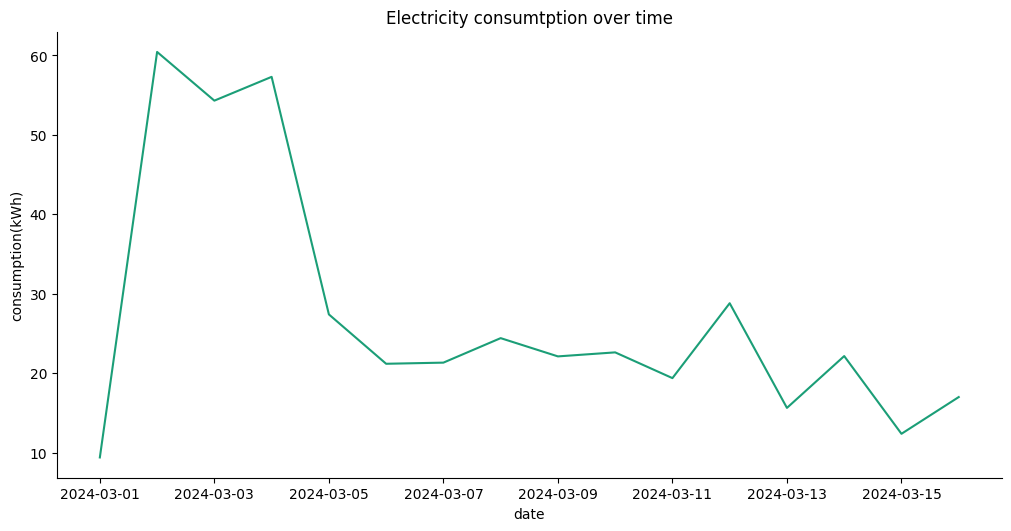

In [ ]:
# @title date vs consumption(kWh)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date']
  ys = series['consumption(kWh)']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = current_df_transform.sort_values('date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
plt.title('Electricity consumtption over time')
_ = plt.ylabel('consumption(kWh)')

<ipython-input-142-9b445fd9139c>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(current_df_transform, x='consumption(kWh)', y='day_name', inner='stick', palette='Dark2')


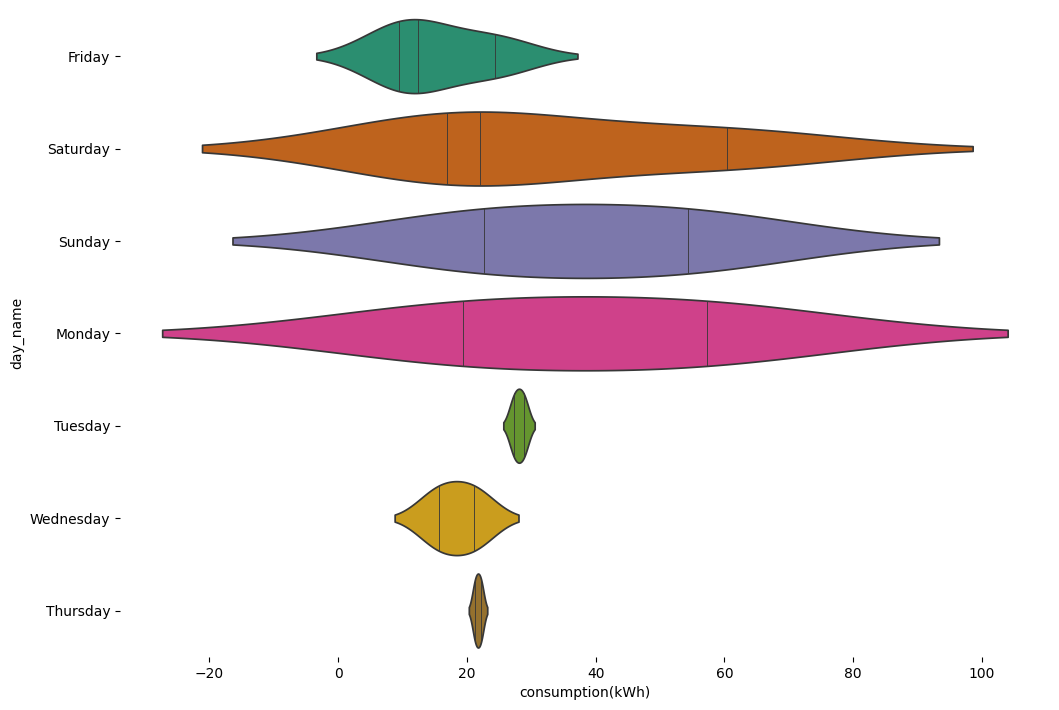

In [ ]:
# @title day_name vs consumption(kWh)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(current_df_transform['day_name'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(current_df_transform, x='consumption(kWh)', y='day_name', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)